# What factors cause customers to attrite?

# Data Loading

In [229]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

data = "/content/drive/My Drive/Abhay_Summer_Project1/Telco-Customer-Churn.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [230]:
# Check data types
Telco_Customer_Churn = pd.read_csv(data, index_col = 0)
print(Telco_Customer_Churn.info())
Telco_Customer_Churn.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [231]:
# Convert 'TotalCharges' to numeric data type
Telco_Customer_Churn['TotalCharges'] = pd.to_numeric(Telco_Customer_Churn['TotalCharges'], errors='coerce')

In [232]:
# find all categorical columns and convert to category data type
categorical_fields = Telco_Customer_Churn.select_dtypes(include=['object']).columns
Telco_Customer_Churn[categorical_fields] = Telco_Customer_Churn[categorical_fields].astype('category')

Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod 

In [233]:
# check for duplicates
Telco_Customer_Churn.duplicated().sum()

# since there are duplicates, I will drop them
Telco_Customer_Churn.drop_duplicates(inplace = True)

In [234]:
# Check for null values
Telco_Customer_Churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [235]:
# drop the 11 null values from TotalCharges; there are only 11 which is a relatively small number to this dataset
Telco_Customer_Churn.dropna(subset = ['TotalCharges'], inplace = True)

# check summary statistics and counts
print(Telco_Customer_Churn.describe())
print(Telco_Customer_Churn.describe(include='category'))

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7010.000000  7010.000000     7010.000000   7010.000000
mean        0.162767    32.520399       64.888666   2290.353388
std         0.369180    24.520441       30.064769   2266.820832
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.750000    408.312500
50%         0.000000    29.000000       70.400000   1403.875000
75%         0.000000    56.000000       89.900000   3807.837500
max         1.000000    72.000000      118.750000   8684.800000
       gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7010    7010       7010         7010          7010            7010   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3535    3617       4911         6330          3363            3090   

       OnlineSecurity Online

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

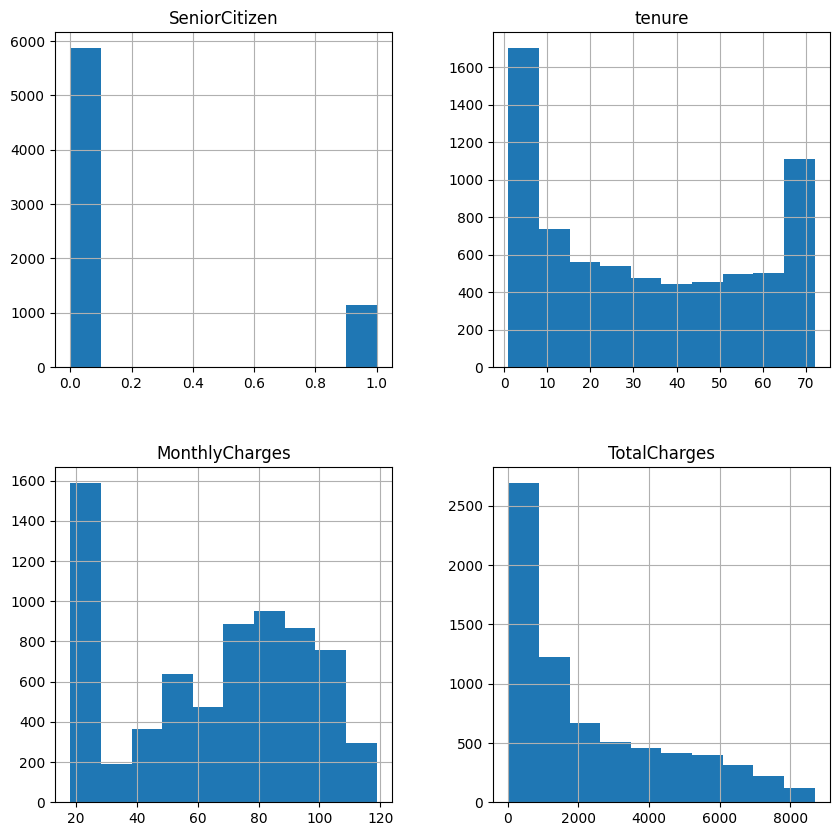

In [236]:
# Distribution of numerical columns
Telco_Customer_Churn.hist(figsize = (10, 10))

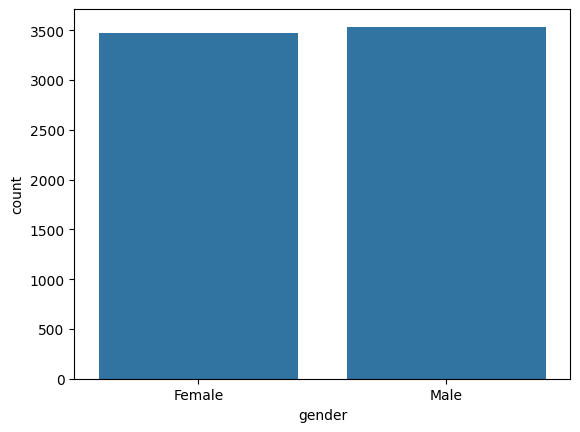

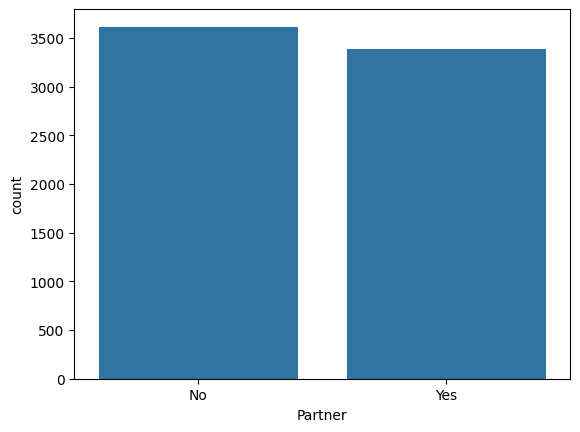

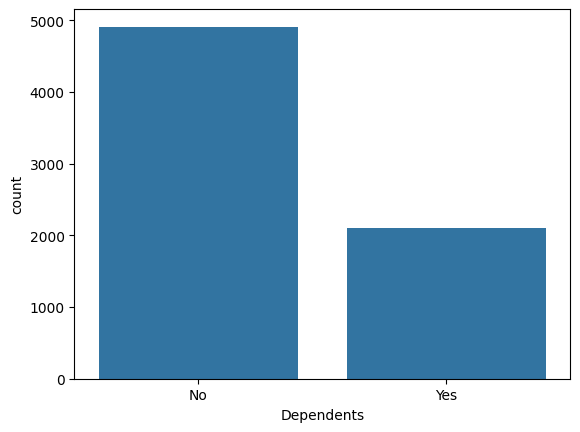

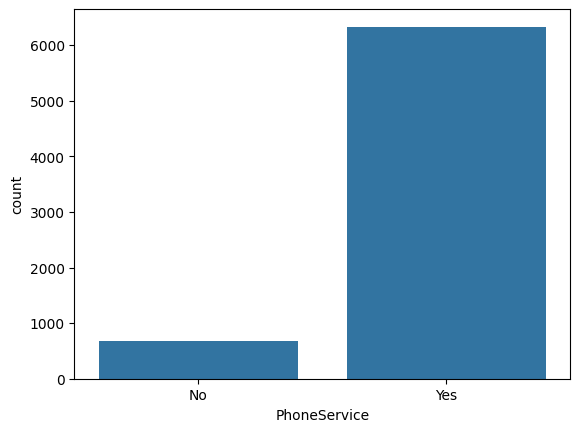

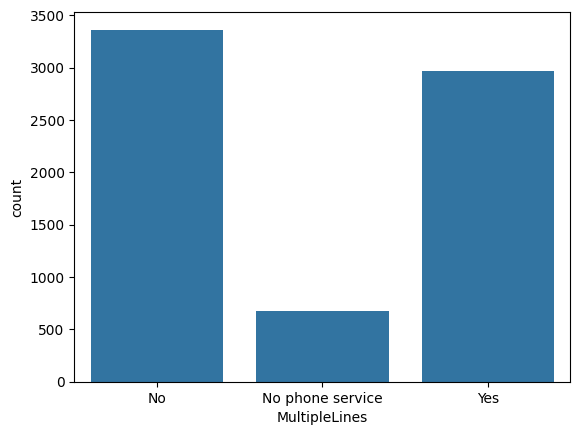

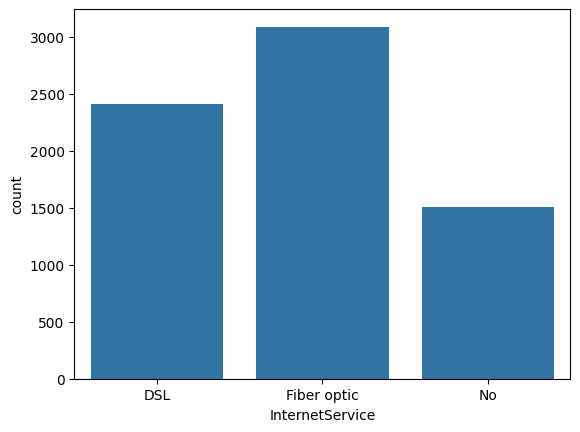

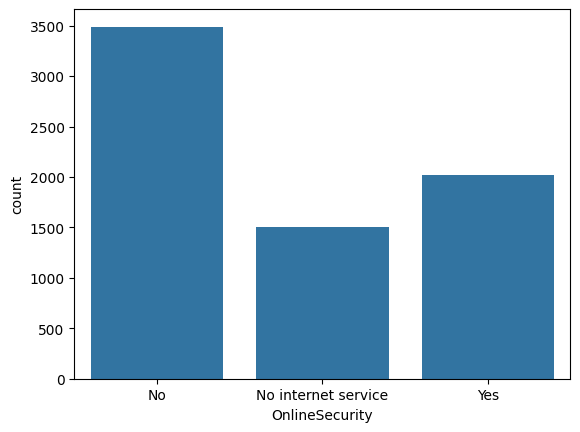

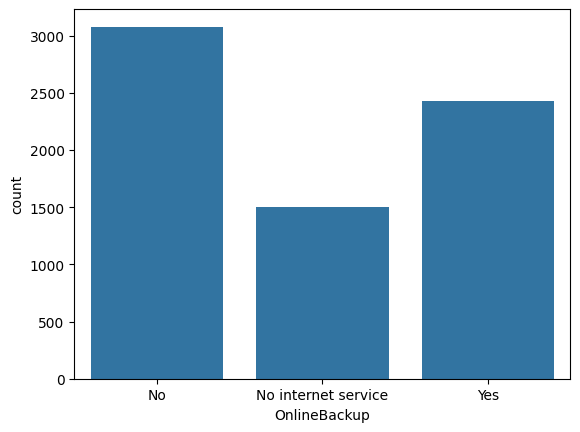

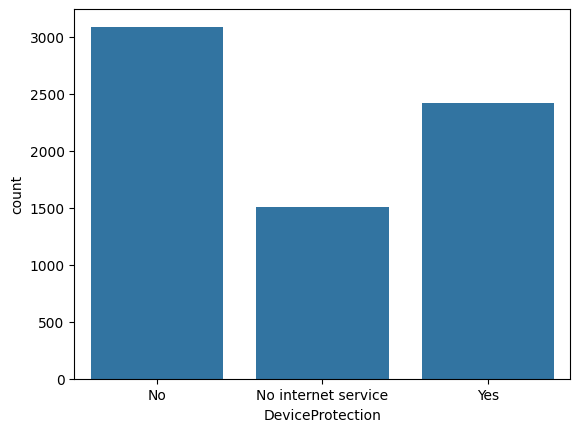

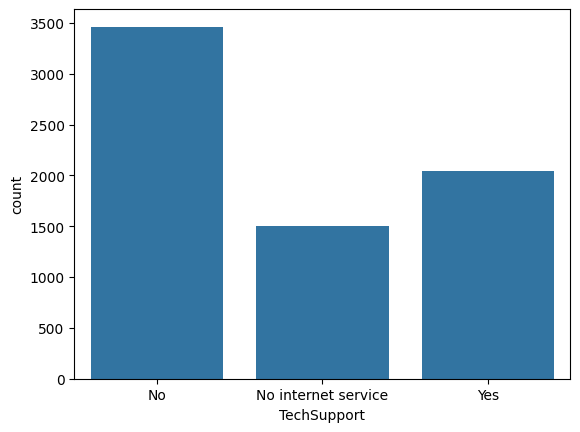

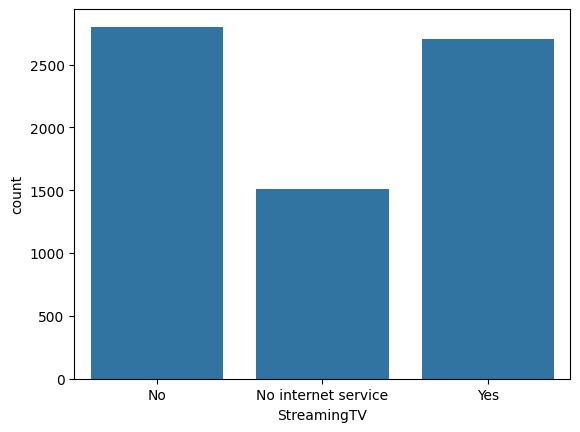

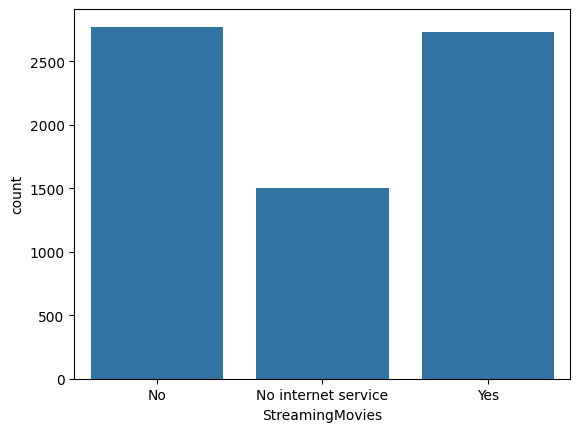

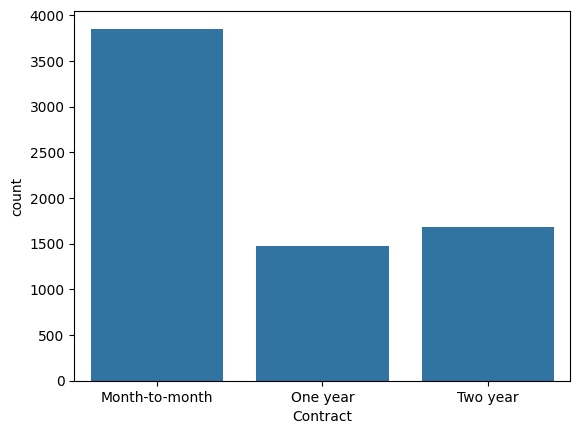

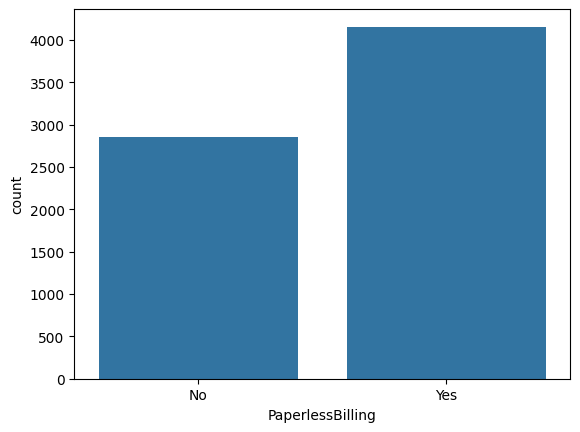

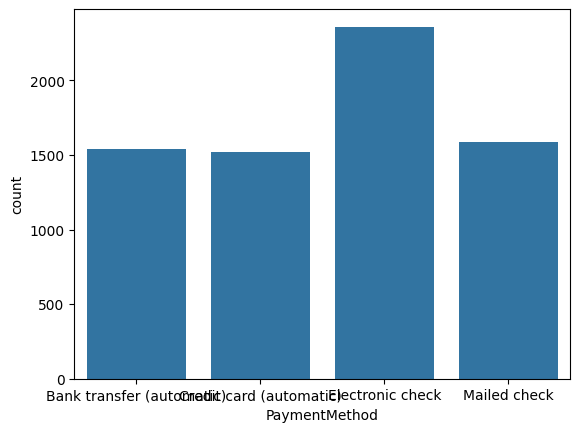

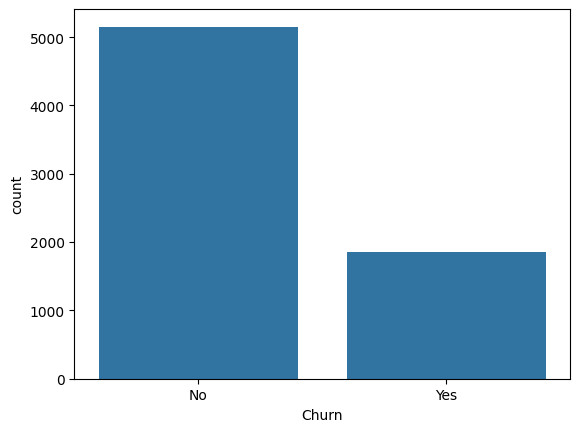

In [237]:
# Distribution visualizations of categorical variables
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_fields:
    sns.countplot(x = col, data = Telco_Customer_Churn)
    plt.show()

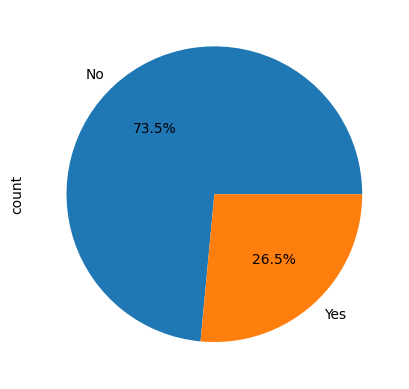

In [238]:
# pie chart of churn
Telco_Customer_Churn['Churn'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

**Observations**

After observing the Churn count plot and pie chart visualization, we can see that of all the Telco customers, 26.5% churned while 73.5% did not churn.

This exemplifies imbalanced data, which will be dealt with before the modeling process.

# Statistical Tests

In [239]:
from scipy.stats import chi2_contingency, ttest_ind

In [240]:
# creating function to perform chi-square test of independence
def check_for_dependency (data, x, y) :
    obs_x = pd.crosstab(data[x],data[y])
    chi2, p, dof, expected = chi2_contingency(obs_x)
    alpha = 0.05

    print(f'{x}, {y}')
    if p<alpha :
        print (f'chi-square Statistic: {chi2} \np-value: {p} < {alpha} \n{x} and {y} are dependent (significant)')
        print()
    else :
        print (f'chi-square Statistic: {chi2} \np-value: {p} > {alpha} \n{x} and {y} are independent (not significant)')
        print()

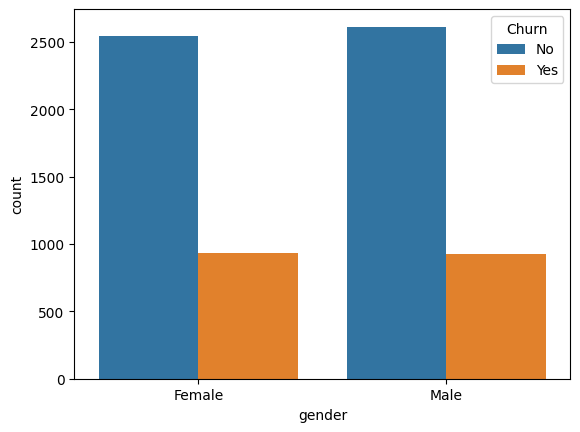

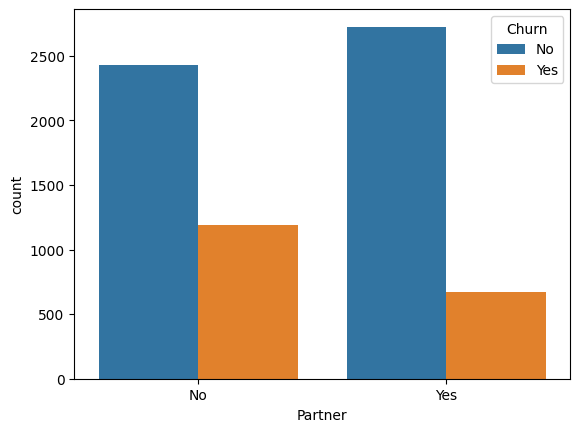

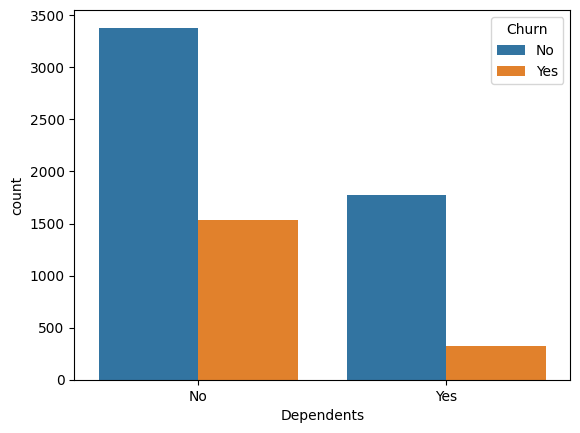

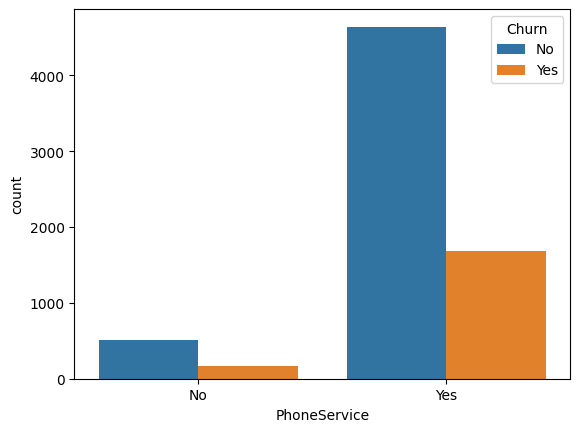

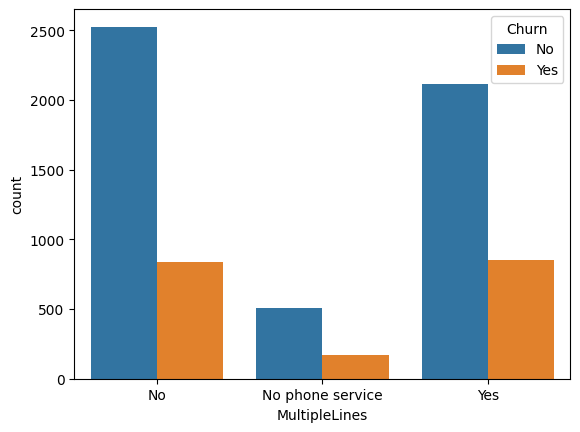

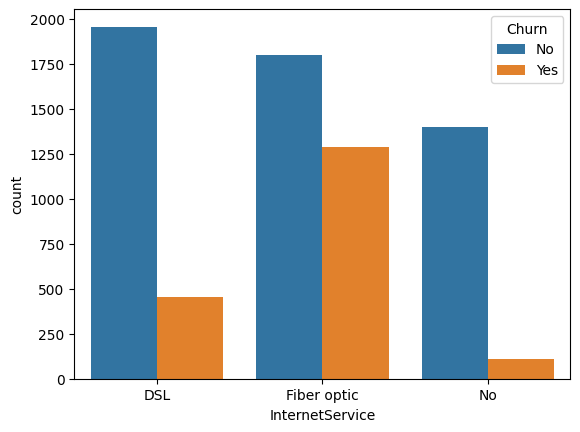

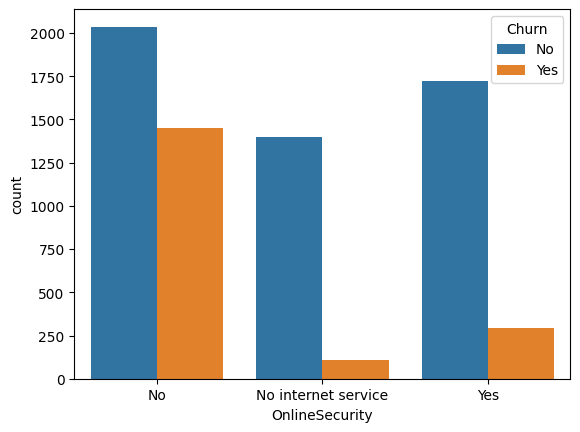

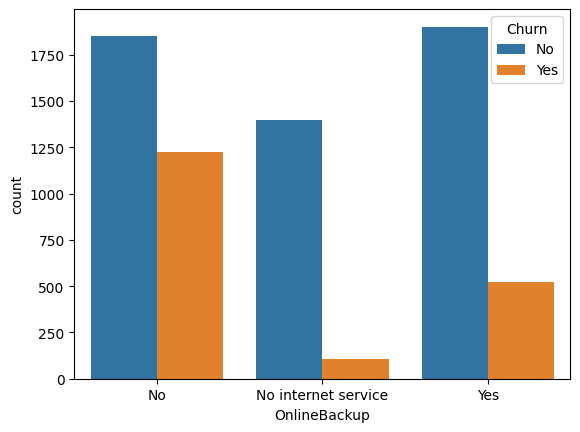

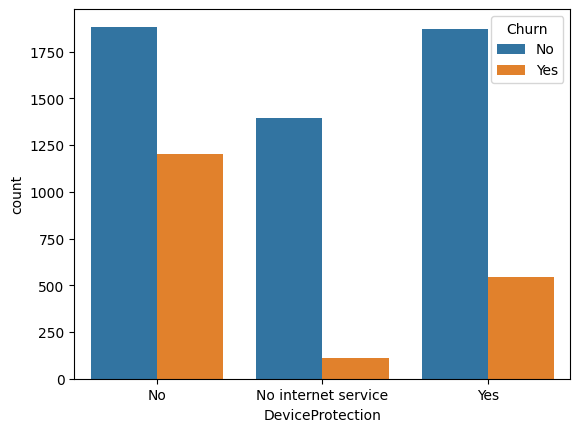

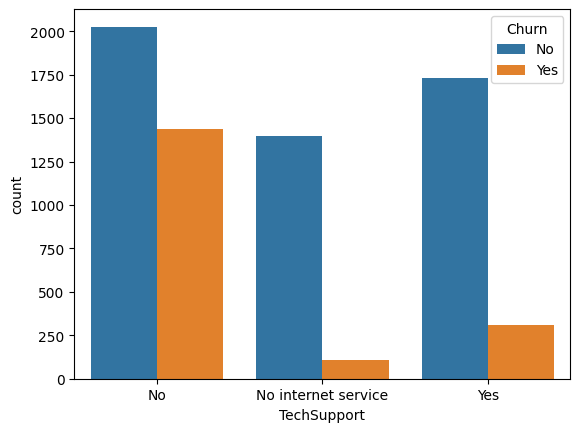

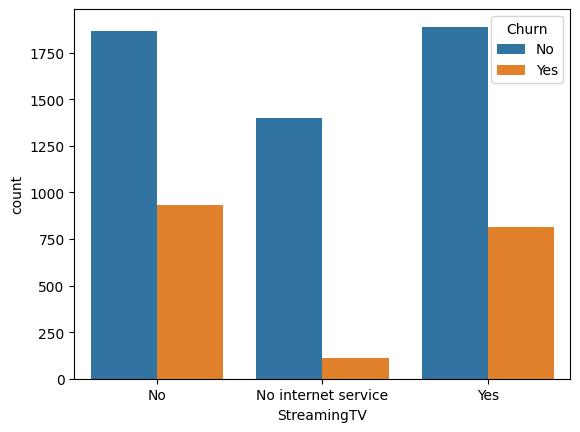

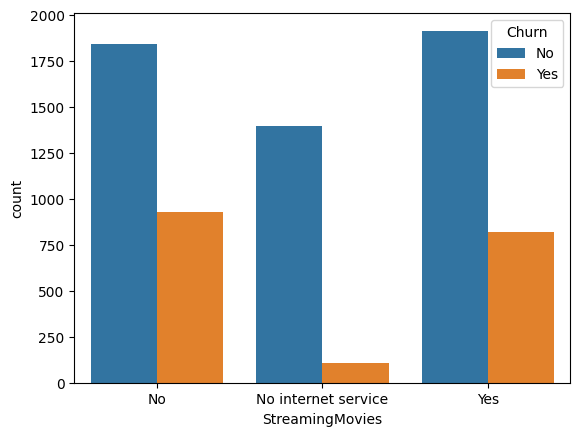

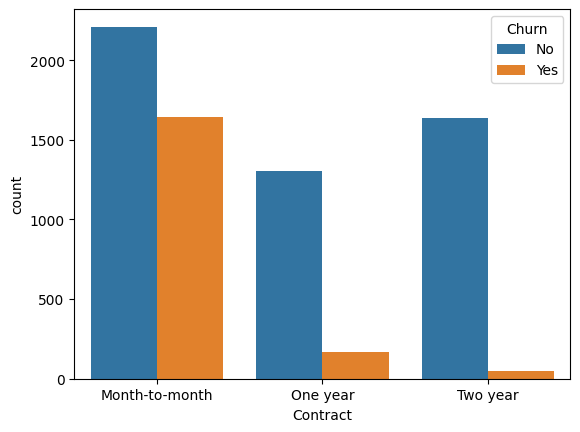

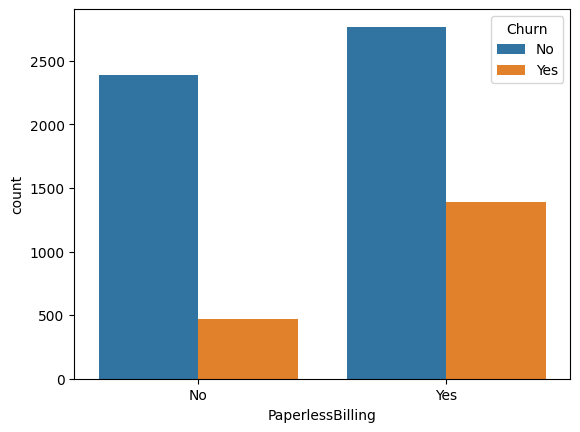

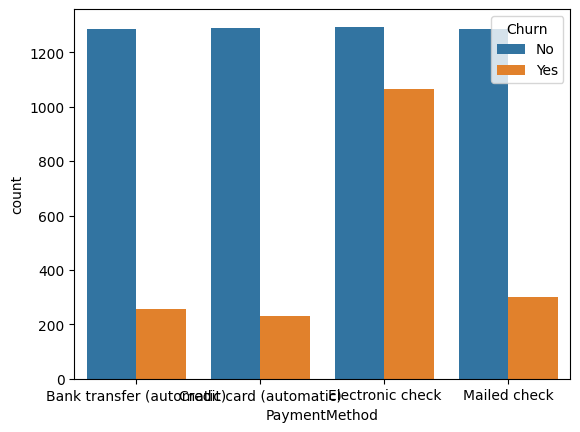

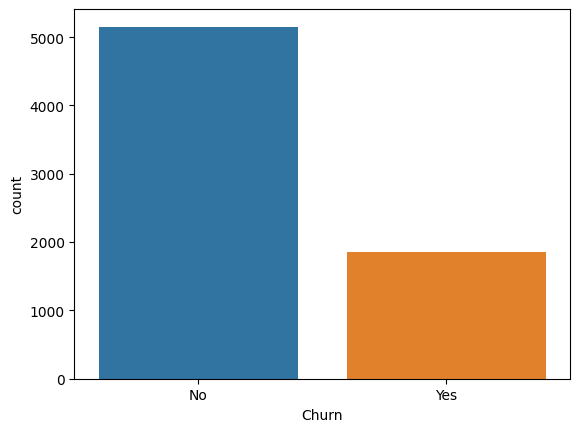

In [241]:
# Visualizations of categorical variables against churn in a grid form with rows of 3 charts

for x in categorical_fields:
    sns.countplot(x = x, hue = 'Churn', data = Telco_Customer_Churn)
    plt.show()

In [242]:
# performing chi-square test of independence between categorical variables and 'Churn'
for x in categorical_fields:
    check_for_dependency(Telco_Customer_Churn, x,'Churn')

gender, Churn
chi-square Statistic: 0.491236602618337 
p-value: 0.4833762023458479 > 0.05 
gender and Churn are independent (not significant)

Partner, Churn
chi-square Statistic: 154.26693117310947 
p-value: 2.0248561714739414e-35 < 0.05 
Partner and Churn are dependent (significant)

Dependents, Churn
chi-square Statistic: 183.99998732389344 
p-value: 6.48802519091279e-42 < 0.05 
Dependents and Churn are dependent (significant)

PhoneService, Churn
chi-square Statistic: 0.7766911304348848 
p-value: 0.37815502389537725 > 0.05 
PhoneService and Churn are independent (not significant)

MultipleLines, Churn
chi-square Statistic: 12.303285849890518 
p-value: 0.002129979497390785 < 0.05 
MultipleLines and Churn are dependent (significant)

InternetService, Churn
chi-square Statistic: 728.444400823442 
p-value: 6.611624411865297e-159 < 0.05 
InternetService and Churn are dependent (significant)

OnlineSecurity, Churn
chi-square Statistic: 843.4654315552659 
p-value: 6.979249107542706e-184 <

**Observations**

Based on these chi-square tests of independence, we know that **gender** and **Phone Service** aren't influential when it comes to Churn.

Customers that **don't have a parner** are likely to churn.

Customers that **don't have dependents** are likely to churn.

Customers that **subscribe to MultipleLines** are likely to churn.

Customers that **subscribe to InternetService** are likely to churn.

Customers that are subscribed to InternetService that **don't** have backup support such as **OnlineSecurity**, **TechSupport**, **OnlineBackup**, or **DeviceProtection** are more likely to churn.

Customers that don't have **StreamingTV** or **StreamingMovies** are more likely to churn.

Customers that are either **on contract** (specifically month-to-month contract), with **PaperlessBilling**, or using the electronic check **PaymentMethod** are more likley to churn.






# Data Preparation for Statistcal Modeling




In [243]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [244]:
# Label Encoding

# Replace 'No' with 0 and 'Yes' with 1 in the 'Churn' column
Telco_Customer_Churn['Churn'] = Telco_Customer_Churn['Churn'].replace({'No': 0, 'Yes': 1})

# Replace 'Male' with 0 and 'Female' with 1 in the 'gender' column
Telco_Customer_Churn['gender'] = Telco_Customer_Churn['gender'].replace({'Male': 0, 'Female': 1})

# Replace 'No' with 0 and 'Yes' with 1 in the 'Partner' column
Telco_Customer_Churn['Partner'] = Telco_Customer_Churn['Partner'].replace(['No' ,'Yes'],[0,1])

# Replace 'No' with 0 and 'Yes' with 1 in the 'Dependents' column
Telco_Customer_Churn['Dependents'] = Telco_Customer_Churn['Dependents'].replace(['No' ,'Yes'],[0,1])

# Replace 'No' with 0, 'Yes' with 1, and 'No phone service' with 0 in the 'MultipleLines' column
Telco_Customer_Churn['MultipleLines'] = Telco_Customer_Churn['MultipleLines'].replace(['No' ,'Yes', 'No phone service'],[0, 1, 0])

# Replace 'No' with 0, 'Fiber optic' with 1, and 'DSL' with 0 in the 'InternetService' column
Telco_Customer_Churn['InternetService'] = Telco_Customer_Churn['InternetService'].replace({'No': 0, 'Fiber optic': 2, 'DSL': 1})

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'OnlineSecurity' column
Telco_Customer_Churn['OnlineSecurity'] = Telco_Customer_Churn['OnlineSecurity'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'OnlineBackup' column
Telco_Customer_Churn['OnlineBackup'] = Telco_Customer_Churn['OnlineBackup'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'DeviceProtection' column
Telco_Customer_Churn['DeviceProtection'] = Telco_Customer_Churn['DeviceProtection'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'TechSupport' column
Telco_Customer_Churn['TechSupport'] = Telco_Customer_Churn['TechSupport'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'StreamingTV' column
Telco_Customer_Churn['StreamingTV'] = Telco_Customer_Churn['StreamingTV'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'StreamingMovies' column
Telco_Customer_Churn['StreamingMovies'] = Telco_Customer_Churn['StreamingMovies'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'PaperlessBilling' column
Telco_Customer_Churn['PaperlessBilling'] = Telco_Customer_Churn['PaperlessBilling'].replace(['No' ,'Yes'],[0, 1])

# Replace 'No' with 0, 'Yes' with 1 in the 'PhoneService' column
Telco_Customer_Churn['PhoneService'] = Telco_Customer_Churn['PhoneService'].replace(['No' ,'Yes'],[0, 1])

Contract_dict = {
    'Month-to-month' : 0,
    'One year' : 1,
    'Two year' : 2}

Telco_Customer_Churn['Contract'] = Telco_Customer_Churn['Contract'].map(Contract_dict)

In [245]:
# One-hot encoding
Telco_Customer_Churn_Encoded = pd.get_dummies(Telco_Customer_Churn, columns=['PaymentMethod']).astype(int)

In [246]:
# See if there are duplicates
Telco_Customer_Churn_Encoded.duplicated().sum()

126

In [247]:
# There are duplicates, but a relatively small number, so I will remove them
Telco_Customer_Churn_Encoded.drop_duplicates(keep = 'first', inplace = True)

# Training and Evaluating Models

In [248]:
# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

X = Telco_Customer_Churn_Encoded.drop('Churn', axis = 1)
y = Telco_Customer_Churn_Encoded['Churn']

# using oversampling method to populate churn rate
X_over_smote, y_over_smote = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.25, random_state=42)

In [249]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

print('X_train_std: \n', X_train_std, '\n')
print('X_test_std: \n', X_test_std)

X_train_std: 
 [[-0.85884108 -0.39402184 -0.7857191  ... -0.43031813 -0.72880456
  -0.44412011]
 [ 1.16435976 -0.39402184 -0.7857191  ... -0.43031813  1.37210997
  -0.44412011]
 [-0.85884108 -0.39402184 -0.7857191  ... -0.43031813  1.37210997
  -0.44412011]
 ...
 [-0.85884108 -0.39402184  1.27271948 ... -0.43031813 -0.72880456
   2.25164312]
 [-0.85884108 -0.39402184 -0.7857191  ... -0.43031813 -0.72880456
   2.25164312]
 [-0.85884108  2.53793037  1.27271948 ... -0.43031813  1.37210997
  -0.44412011]] 

X_test_std: 
 [[-0.86117756 -0.40234153 -0.79911527 ... -0.41541844  1.36724883
  -0.44679229]
 [-0.86117756 -0.40234153 -0.79911527 ... -0.41541844 -0.73139576
  -0.44679229]
 [ 1.16120071 -0.40234153 -0.79911527 ... -0.41541844  1.36724883
  -0.44679229]
 ...
 [-0.86117756 -0.40234153  1.25138393 ...  2.40721139 -0.73139576
  -0.44679229]
 [-0.86117756 -0.40234153 -0.79911527 ... -0.41541844 -0.73139576
  -0.44679229]
 [-0.86117756 -0.40234153  1.25138393 ... -0.41541844 -0.73139576
 

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

In [251]:
# cross-validation prep
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Logistic Regression Model

Accuracy: 0.8496466893483381
Recall: 0.8473282442748091
Precision: 0.8497888067581837
F1 Score: 0.8485567417951758
ROC-AUC Score: 0.8496334169591584
 
Mean Recall Score Across all Folds: 0.8470636571666319
 
Confusion Matrix


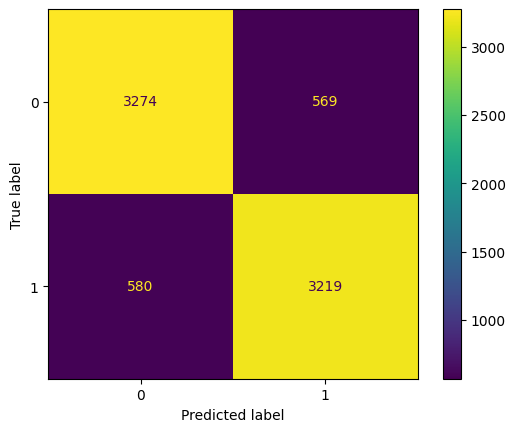

In [252]:
# instantiate model
logreg = LogisticRegression(random_state=42)

# train model on training data
logreg.fit(X_train_std, y_train)

# Perform cross-validation and get recall scores for each fold
recall_scores = cross_val_score(logreg, X_train_std, y_train, cv=cv, scoring='recall')

# evaluate model on training data
train_pred = logreg.predict(X_train_std)
train_accuracy = accuracy_score(y_train, train_pred)
print('Accuracy:', accuracy_score(y_train, train_pred))
print('Recall:', recall_score(y_train, train_pred))
print('Precision:', precision_score(y_train, train_pred))
print('F1 Score:', f1_score(y_train, train_pred))
print('ROC-AUC Score:', roc_auc_score(y_train, train_pred))
print(' ')
print('Mean Recall Score Across all Folds:', recall_scores.mean())
print(' ')
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, train_pred)

Accuracy: 0.8398744113029827
Recall: 0.8294753086419753
Precision: 0.8518225039619651
F1 Score: 0.8405003909304143
ROC-AUC Score: 0.840057143138879
 
Confusion Matrix


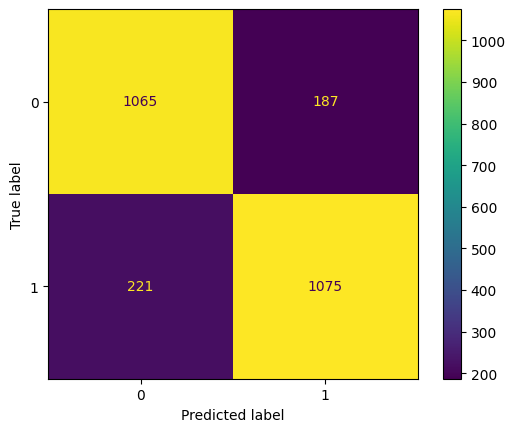

In [253]:
# evaluate model on test data
test_pred = logreg.predict(X_test_std)
test_accuracy = accuracy_score(y_test, test_pred)
print('Accuracy:', accuracy_score(y_test, test_pred))
print('Recall:', recall_score(y_test, test_pred))
print('Precision:', precision_score(y_test, test_pred))
print('F1 Score:', f1_score(y_test, test_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, test_pred))
print(' ')
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)

Decision Tree Classifier


Accuracy: 0.9963360376864695
Recall: 0.9968412740194789
Precision: 0.9957927951617145
F1 Score: 0.996316758747698
ROC-AUC Score: 0.9963389300099996
 
Mean Recall Score Across all Folds: 0.8152142708550031
 
Confusion Matrix


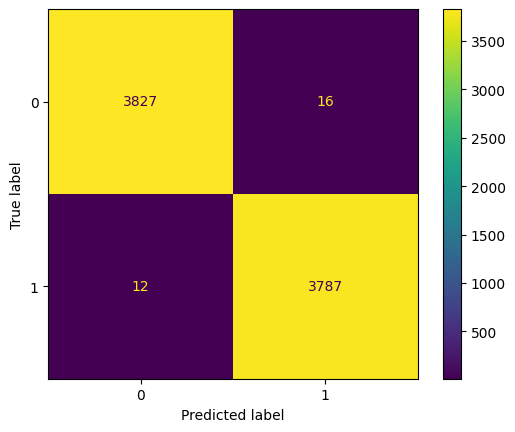

In [254]:
# instantiate model
dt = DecisionTreeClassifier(random_state=42)

# train model on training data
dt.fit(X_train_std, y_train)

# Perform cross-validation and get recall scores for each fold
recall_scores = cross_val_score(dt, X_train_std, y_train, cv=cv, scoring='recall')

# evaluate model on training data
train_pred = dt.predict(X_train_std)
train_accuracy = accuracy_score(y_train, train_pred)
print('Accuracy:', accuracy_score(y_train, train_pred))
print('Recall:', recall_score(y_train, train_pred))
print('Precision:', precision_score(y_train, train_pred))
print('F1 Score:', f1_score(y_train, train_pred))
print('ROC-AUC Score:', roc_auc_score(y_train, train_pred))
print(' ')
print('Mean Recall Score Across all Folds:', recall_scores.mean())
print(' ')
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, train_pred)

Accuracy: 0.7613814756671899
Recall: 0.7399691358024691
Precision: 0.7796747967479675
F1 Score: 0.7593032462391132
ROC-AUC Score: 0.7617577308405317
 
Confusion Matrix


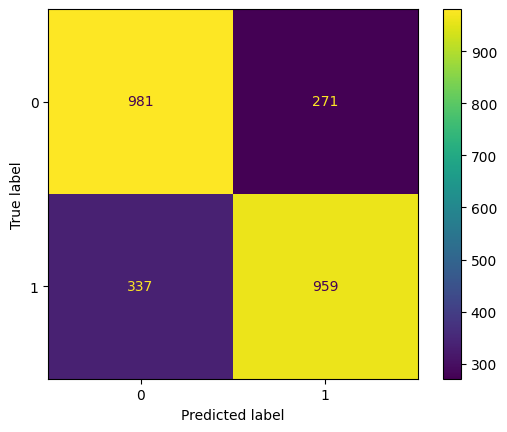

In [255]:
# evaluate model on test data
test_pred = dt.predict(X_test_std)
test_accuracy = accuracy_score(y_test, test_pred)
print('Accuracy:', accuracy_score(y_test, test_pred))
print('Recall:', recall_score(y_test, test_pred))
print('Precision:', precision_score(y_test, test_pred))
print('F1 Score:', f1_score(y_test, test_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, test_pred))
print(' ')
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)

Random Forest Model

Accuracy: 0.9963360376864695
Recall: 0.9992103185048697
Precision: 0.9934572101544098
F1 Score: 0.9963254593175853
ROC-AUC Score: 0.9963524920653415
 
Mean Recall Score Across all Folds: 0.8483784064905346
 
Confusion Matrix


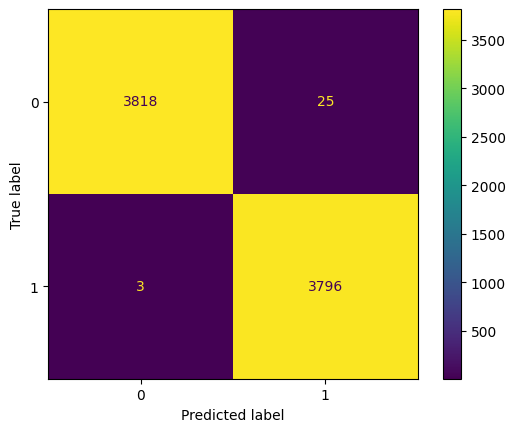

In [256]:
# instantiate model
rf = RandomForestClassifier(random_state=42)

# train model on training data
rf.fit(X_train_std, y_train)

# Perform cross-validation and get recall scores for each fold
recall_scores = cross_val_score(rf, X_train_std, y_train, cv=cv, scoring='recall')

# evaluate model on training data
train_pred = rf.predict(X_train_std)
train_accuracy = accuracy_score(y_train, train_pred)
print('Accuracy:', accuracy_score(y_train, train_pred))
print('Recall:', recall_score(y_train, train_pred))
print('Precision:', precision_score(y_train, train_pred))
print('F1 Score:', f1_score(y_train, train_pred))
print('ROC-AUC Score:', roc_auc_score(y_train, train_pred))
print(' ')
print('Mean Recall Score Across all Folds:', recall_scores.mean())
print(' ')
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, train_pred)

Accuracy: 0.8351648351648352
Recall: 0.8364197530864198
Precision: 0.8390092879256966
F1 Score: 0.8377125193199383
ROC-AUC Score: 0.8351427838914528
 
Confusion Matrix


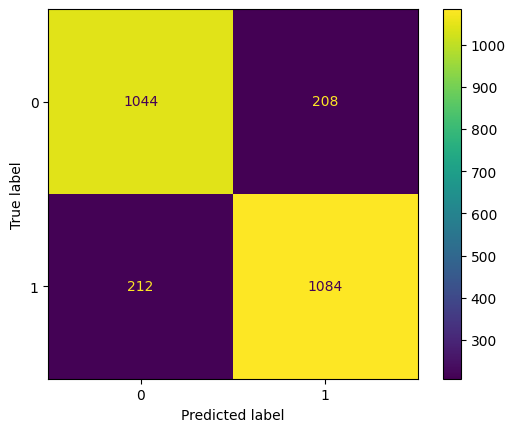

In [257]:
# evaluate model on test data
test_pred = rf.predict(X_test_std)
test_accuracy = accuracy_score(y_test, test_pred)
print('Accuracy:', accuracy_score(y_test, test_pred))
print('Recall:', recall_score(y_test, test_pred))
print('Precision:', precision_score(y_test, test_pred))
print('F1 Score:', f1_score(y_test, test_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, test_pred))
print(' ')
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)

XGBoost Classifier

Accuracy: 0.9638838000523423
Recall: 0.9747301921558305
Precision: 0.9536440896214268
F1 Score: 0.9640718562874251
ROC-AUC Score: 0.9639458923308426
 
Mean Recall Score Across all Folds: 0.8481183690451426
 
Confusion Matrix


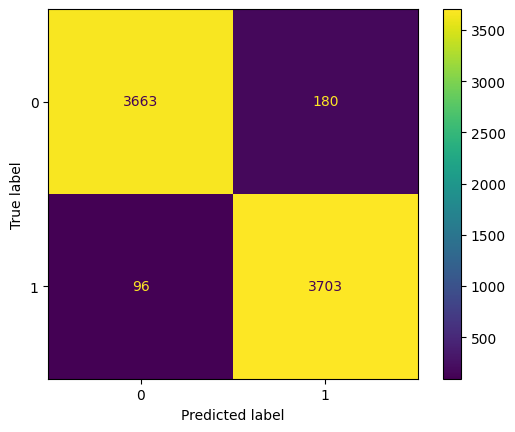

In [258]:
# instantiate model
xgb = XGBClassifier(random_state=42)

# train model on training data
xgb.fit(X_train_std, y_train)

# Perform cross-validation and get recall scores for each fold
recall_scores = cross_val_score(xgb, X_train_std, y_train, cv=cv, scoring='recall')

# evaluate model on training data
train_pred = xgb.predict(X_train_std)
train_accuracy = accuracy_score(y_train, train_pred)
print('Accuracy:', accuracy_score(y_train, train_pred))
print('Recall:', recall_score(y_train, train_pred))
print('Precision:', precision_score(y_train, train_pred))
print('F1 Score:', f1_score(y_train, train_pred))
print('ROC-AUC Score:', roc_auc_score(y_train, train_pred))
print(' ')
print('Mean Recall Score Across all Folds:', recall_scores.mean())
print(' ')
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, train_pred)

Accuracy: 0.6671899529042387
Recall: 0.9868827160493827
Precision: 0.6061611374407583
F1 Score: 0.7510275983558427
ROC-AUC Score: 0.6615723484400269
 
Confusion Matrix


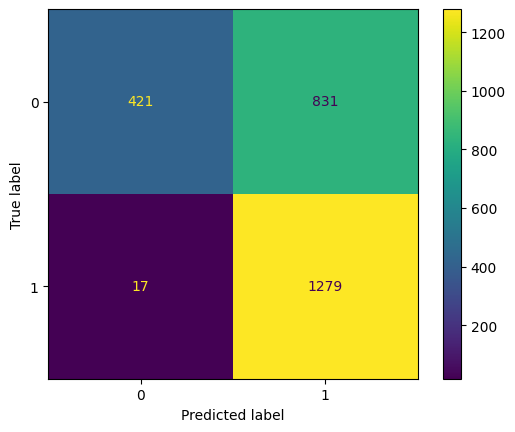

In [259]:
# evaluate model on test data
test_pred = xgb.predict(X_test_std)
test_accuracy = accuracy_score(y_test, test_pred)
print('Accuracy:', accuracy_score(y_test, test_pred))
print('Recall:', recall_score(y_test, test_pred))
print('Precision:', precision_score(y_test, test_pred))
print('F1 Score:', f1_score(y_test, test_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, test_pred))
print(' ')
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)

**Evaluation**

Considering that Churn is our target variable, I will prioritze the consistency of recall for each model trained and tested. Post modeling process, I found that XGBoost has the most consistent recall metric percentage when comparing training and test recalls. I've ranked the following recall percentage differences below:

1) XGBoost


*   Difference: 0.016
*   Training Recall: 0.98
*   Test Recall: 0.996

2) Logistic Regression


*   Difference: 0.013
*   Training Recall: 0.848
*   Test Recall: 0.835

3) Random Forest


*   Difference: 0.157
*   Training Recall: 1.0
*   Test Recall: 0.843

4) Decision Tree


*   Difference: 0.219
*   Training Recall: 0.998
*   Test Recall: 0.779


When comparing test recall score to the base mean cross-validation recall score, Random Forest had the highest recall score, with XGBoost coming in second.

1) Random Forest


*   Mean Recall Across Folds: 0.85

2) XGBoost


*   Mean Recall Across Folds: 0.846

3) Logistic Regression


*   Mean Recall Across Folds: 0.846


4) Decision Tree


*   Mean Recall Across Folds: 0.802

**Final Model**

XGBoost achieved the highest recall scores on both training and test data, with a minimal difference between them. It also had the second highest mean recall across cross-validation folds. Due to its consistency and high accuracy, **XGBoost is chosen as the final model**.

# Feature Importance

In [260]:
# get column names for X_train_std array
feature_names = X_train.columns

# transform X_train_std to a dataframe
X_train_std_df = pd.DataFrame(X_train_std, columns=feature_names)

print(X_train)
print(X_train_std_df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
9699       0              0        0           0       1             0   
2540       1              0        0           0       1             1   
5049       0              0        0           1      11             1   
2228       1              0        0           0       2             1   
1115       0              0        1           1      26             1   
...      ...            ...      ...         ...     ...           ...   
5734       1              0        0           0      15             1   
5191       0              0        0           0      33             1   
5390       0              0        1           1      43             1   
860        0              0        0           1       3             1   
7270       0              1        1           0      13             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
9699              0                1

In [261]:
# RandomForest feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train_std_df.columns).sort_values(ascending=False)

# XGBoost feature importances
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train_std_df.columns).sort_values(ascending=False)

# Decision Tree feature importances
dt_importances = pd.Series(dt.feature_importances_, index=X_train_std_df.columns).sort_values(ascending=False)

# Logistic Regression feature importances
logreg_importances = pd.Series(logreg.coef_[0], index=X_train_std_df.columns).sort_values(ascending=False)


In [262]:
# normalize the importances
dt_importances /= dt_importances.sum()
rf_importances /= rf_importances.sum()
xgb_importances /= xgb_importances.sum()
logreg_importances /= logreg_importances.sum()

# aggregate the importances
combined_importances = (dt_importances + rf_importances + xgb_importances + logreg_importances) / 4

# sort the importances
combined_importances = combined_importances.sort_values(ascending=False)

In [263]:
combined_importances

Contract                                   0.225180
tenure                                     0.097471
InternetService                            0.085049
PaymentMethod_Credit card (automatic)      0.070670
PaymentMethod_Mailed check                 0.067018
PaymentMethod_Electronic check             0.065874
PaymentMethod_Bank transfer (automatic)    0.065465
TotalCharges                               0.047891
OnlineSecurity                             0.044357
PhoneService                               0.037448
TechSupport                                0.035444
OnlineBackup                               0.027865
StreamingTV                                0.026946
StreamingMovies                            0.026803
DeviceProtection                           0.022070
Dependents                                 0.020427
MultipleLines                              0.019157
Partner                                    0.017259
gender                                     0.017144
SeniorCitize

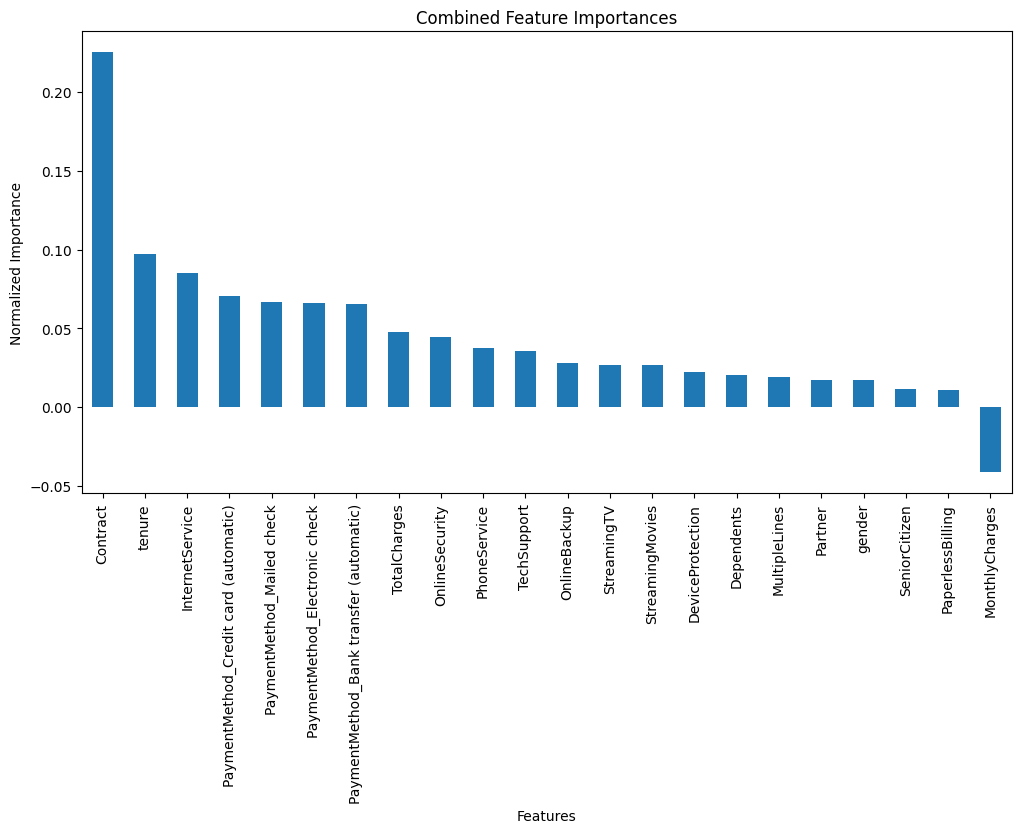

In [264]:
# Plot the consensus feature importances
plt.figure(figsize=(12, 6))
combined_importances.plot(kind='bar')
plt.title('Combined Feature Importances')
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.show()